## Student Admission Prediction NoteBook
In this notebook, I will build machine learning models to predict whether students will get admitted to the university based on certain features

### Import the necessary libraries to get started

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Load the relevant datasets and check for missing values

In [25]:
train_df = pd.read_csv('train.csv')
train = train_df.copy()
test_df = pd.read_csv('test.csv')
test = test_df.copy()
variable_desc = pd.read_csv('variable_description.csv')
cat_cols  = ['University Rating', 'Research', 'First_Generation']
num_cols  = ['GRE Score', 'TOEFL Score', 'SOP',  'CGPA', 'Age']
# train[cat_cols] = train[cat_cols].astype('category')
print(train.shape)
print(train.isna().sum())

(3600, 12)
ID                     0
GRE Score            360
TOEFL Score          360
University Rating      0
SOP                  360
LOR                    0
CGPA                 360
Research               0
Admitted               0
Age                    0
Location               0
First_Generation       0
dtype: int64


In [26]:
variable_desc = pd.read_csv('variable_description.csv')
variable_desc

[[f'{i}: {j}'] for i,j in zip(variable_desc['Column Name'], variable_desc['Description'])] 

[['GRE Score: Graduate Record Examination score (out of 340)'],
 ['TOEFL Score: Test of English as a Foreign Language score (out of 120)'],
 ['University Rating: Rating of the university the applicant is applying to (1 to 5)'],
 ['SOP: Strength of the Statement of Purpose (rated 1 to 5)'],
 ['LOR: Strength of the Letter of Recommendation (rated 1 to 5)'],
 ['CGPA: Undergraduate GPA (on a 10-point scale)'],
 ['Location           : what continent is the applicant in'],
 ['Age                : what is the age of the applicant'],
 ['Research: Whether the applicant has research experience (1 = Yes, 0 = No)'],
 ['Admitted: Target variable; 1 = Admitted, 0 = Not Admitted']]

In [27]:
train.head()
# outliers = train.loc[(train['GRE Score'] >340) | (train['TOEFL Score'] >120) | (train['CGPA'] >10) | (train['LOR'] > 5) | (train['SOP']>5)]

,ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted,Age,Location,First_Generation
0,ID_000001,319.0,111.0,4,4.78,4.89,9.51,1,1,26,South America,1
1,ID_000002,327.0,113.0,5,4.24,4.74,10.19,1,1,23,Africa,1
2,ID_000003,323.0,110.0,4,3.43,2.99,8.81,1,1,32,South America,0
3,ID_000004,321.0,105.0,3,3.41,3.38,NaN,0,0,34,Africa,1
4,ID_000005,316.0,108.0,3,NaN,4.80,NaN,1,1,30,North America,1


In [28]:
print(f' Shape of Dataset: {train.shape}')
train.describe()

 Shape of Dataset: (3600, 12)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted,Age,First_Generation
count,3240.000000,3240.000000,3600.000000,3240.000000,3600.000000,3240.000000,3600.00000,3600.000000,3600.000000,3600.000000
mean,315.670370,106.384877,2.880000,3.373710,3.430964,8.576917,0.45500,0.665278,27.387778,0.494444
std,11.182755,6.210148,1.087216,1.244215,1.192197,0.987162,0.49804,0.471959,4.624213,0.500039
min,289.000000,90.000000,1.000000,-0.510000,-0.640000,5.330000,0.00000,0.000000,20.000000,0.000000
25%,307.000000,102.000000,2.000000,2.530000,2.600000,7.890000,0.00000,0.000000,23.000000,0.000000
50%,316.000000,106.000000,3.000000,3.400000,3.460000,8.600000,0.00000,1.000000,27.000000,0.000000
75%,324.000000,111.000000,4.000000,4.290000,4.280000,9.250000,1.00000,1.000000,31.000000,1.000000
max,341.000000,121.000000,5.000000,7.070000,7.220000,12.840000,1.00000,1.000000,35.000000,1.000000


In [29]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3600 non-null   object 
 1   GRE Score          3240 non-null   float64
 2   TOEFL Score        3240 non-null   float64
 3   University Rating  3600 non-null   int64  
 4   SOP                3240 non-null   float64
 5   LOR                3600 non-null   float64
 6   CGPA               3240 non-null   float64
 7   Research           3600 non-null   int64  
 8   Admitted           3600 non-null   int64  
 9   Age                3600 non-null   int64  
 10  Location           3600 non-null   object 
 11  First_Generation   3600 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 337.6+ KB
None


### Since the missing values are numeric, we handle them by replacing them with the median values

In [30]:
train.rename(columns = {'LOR ': 'LOR'}, inplace=True)
missing_cols = ['GRE Score', 'TOEFL Score', 'SOP', 'CGPA']

#Fill in missing values since they are up to 10% of our dataset
train[missing_cols] = train[missing_cols].fillna(train[missing_cols].median())
print(train.isna().sum())

ID                   0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
Age                  0
Location             0
First_Generation     0
dtype: int64


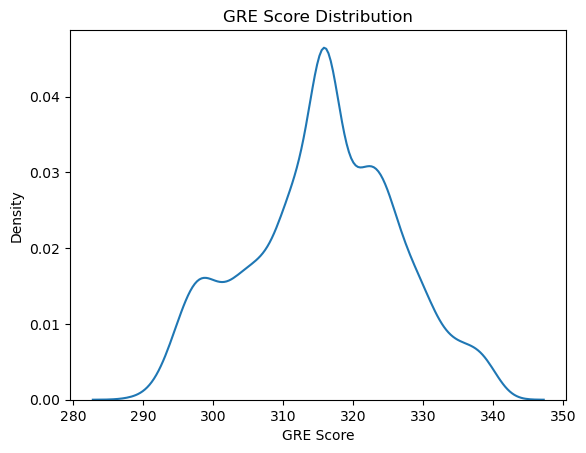

In [92]:
sns.kdeplot(train, x='GRE Score')
plt.title('GRE Score Distribution');
plt.savefig('GRE Score Distribution', bbox_inches='tight');

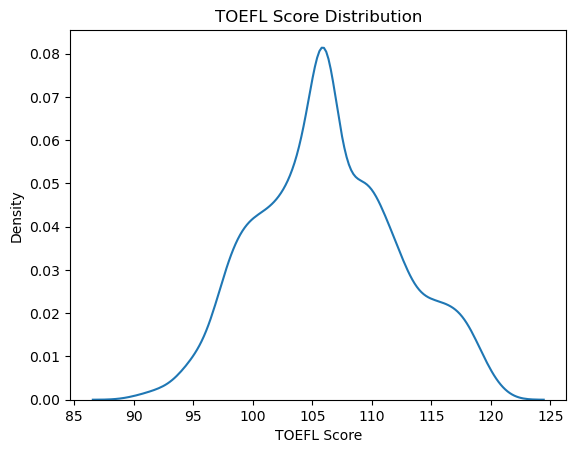

In [93]:
sns.kdeplot(train, x='TOEFL Score')
plt.title('TOEFL Score Distribution')
plt.savefig('TOEFL Score Distribution', bbox_inches='tight');

### We have a class imbalance in the target variable in our dataset as shown in the barchart below

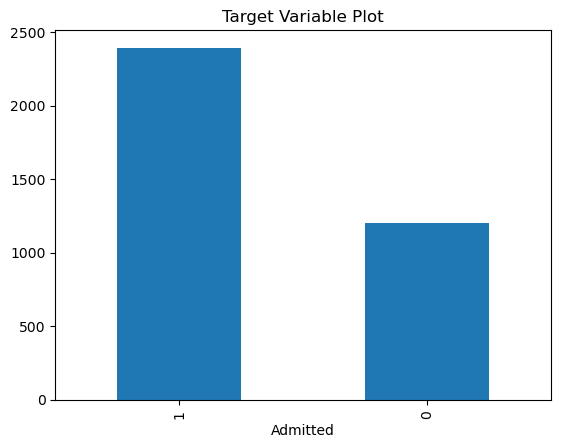

In [17]:
train['Admitted'].value_counts().plot(kind='bar')
plt.title('Target Variable Plot');

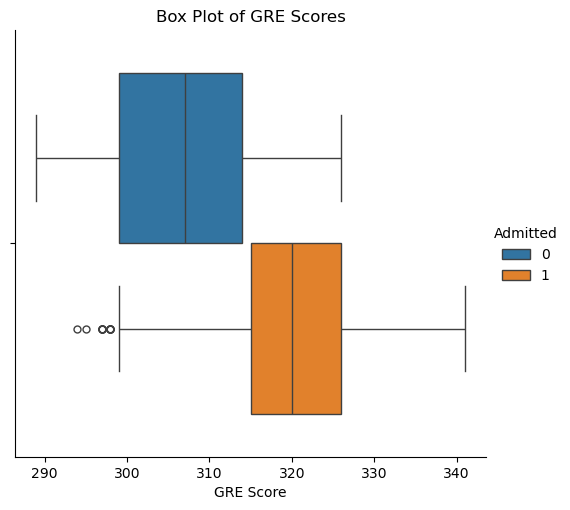

In [94]:
sns.catplot(data=train, x='GRE Score', kind='box', hue='Admitted')
plt.title('Box Plot of GRE Scores')
plt.savefig('Box plot of GRE Scores.png', bbox_inches='tight');

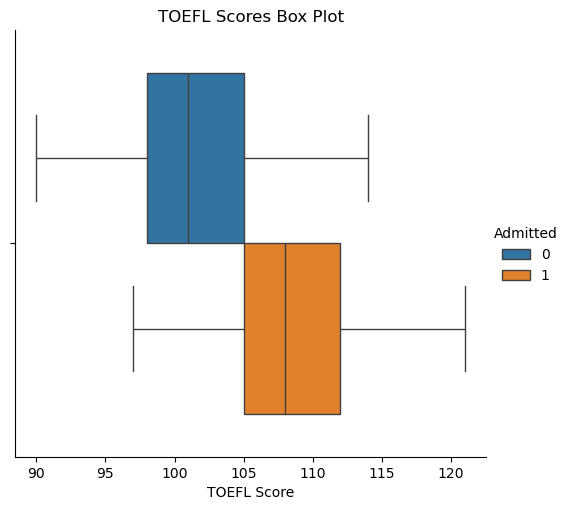

In [98]:
sns.catplot(train, x='TOEFL Score', kind='box', hue='Admitted')
plt.title('TOEFL Scores Box Plot')
plt.savefig('Box plot of TOEFL Scores.png', bbox_inches='tight');

### Our plots above show that students who have better GRE Score and TOEFL Score tend to have a better shot at Admission

Research  Admitted
0         0           1094
          1            868
1         0            111
          1           1527
Name: Admitted, dtype: int64


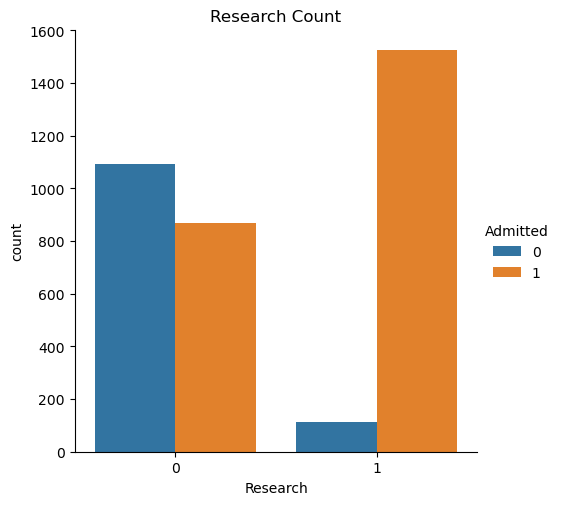

In [100]:
sns.catplot(train, x='Research', kind='count', hue='Admitted')
plt.title('Research Count');
print(train.groupby(['Research', 'Admitted'])['Admitted'].count());
plt.savefig('research count comparison.png', bbox_inches='tight');

Admitted                   0          1
University Rating                      
1                  88.650307  11.349693
2                  58.432088  41.567912
3                  21.317158  78.682842
4                   3.840878  96.159122
5                   0.340136  99.659864


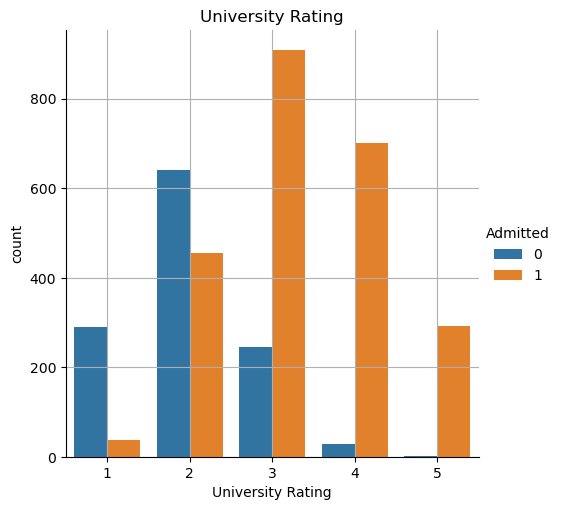

In [83]:
sns.catplot(train, x='University Rating', kind='count', hue='Admitted')
plt.title('University Rating')
plt.grid(True);
print(train.groupby('University Rating')['Admitted'].value_counts(normalize=True).unstack()*100)
plt.savefig('uni ratings.png', bbox_inches='tight');

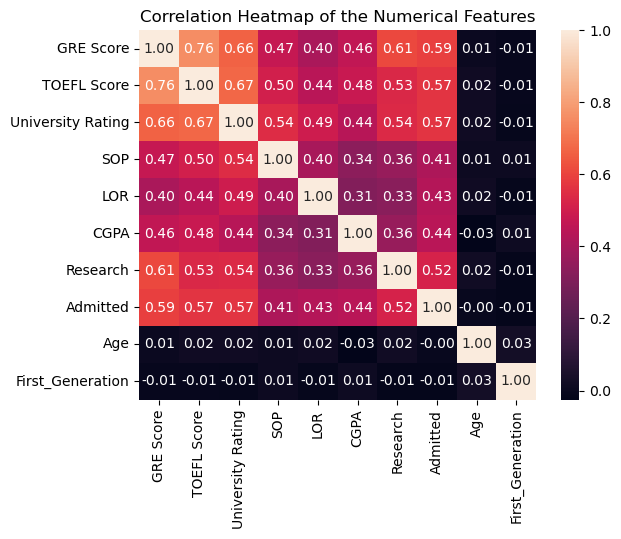

In [102]:
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title('Correlation Heatmap of the Numerical Features')
plt.savefig('corr matrix.png', bbox_inches='tight');

In [28]:
train.columns

Index(['ID', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research', 'Admitted', 'Age', 'Location', 'First_Generation'],
      dtype='object')

Admitted         0    1
Location               
Africa         247  469
Asia           245  476
Europe         245  479
North America  238  470
South America  230  501


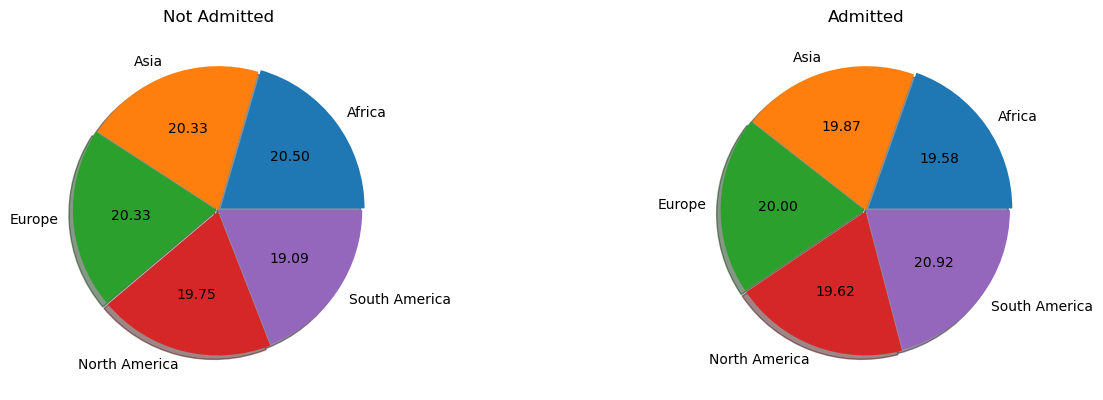

In [159]:
# location = train['Location'].value_counts()
# plt.pie(location.values, labels = location.index, autopct='%.2f', explode=[0.02, .0, .01, .01, .0],shadow=True )
# plt.title('Continent Distribution')
# plt.savefig('continent distribution.png', bbox_inches='tight');
# lo.values
# prop_df[0]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 10))
lst = ['Not Admitted', 'Admitted']
for axis, i in zip(ax, range(2)):
    axis.pie(prop_df[i].values, labels = prop_df[i].index, autopct='%.2f', explode=[0.02, .0, .01, .01, .0],shadow=True, )
    axis.set_title(lst[i])
    plt.subplots_adjust(wspace=.8)
    # plt.suptitle('Admission Ratio')
    # ax[0][1] = plt.pie(prop_df[0].values, labels = prop_df[0].index, autopct='%.2f', explode=[0.02, .0, .01, .01, .0],shadow=True );
print(prop_df)
plt.savefig('Admitted ratio.png', bbox_inches='tight');

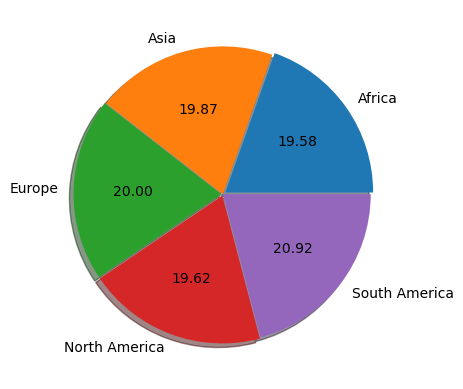

In [121]:
plt.pie(prop_df[1].values, labels = prop_df[1].index, autopct='%.2f', explode=[0.02, .0, .01, .01, .0],shadow=True );

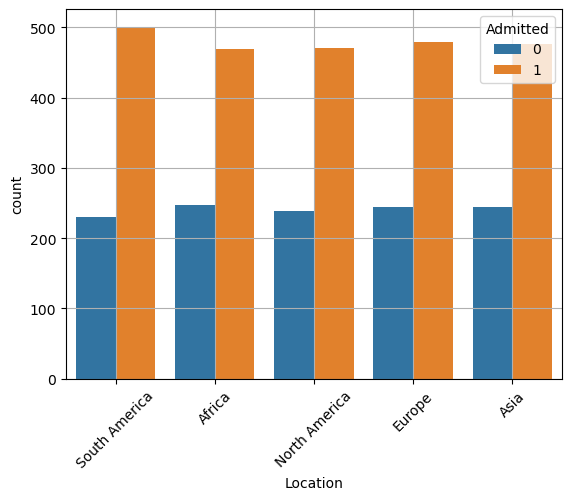

In [103]:
sns.countplot(train, x='Location', hue='Admitted')
plt.xticks(rotation=45)
plt.grid(True);

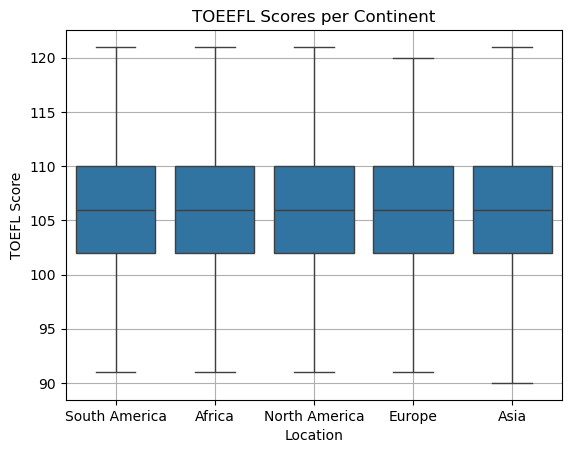

In [87]:
sns.boxplot(train, y='TOEFL Score', x='Location') 
plt.title('TOEEFL Scores per Continent')
plt.grid(True);

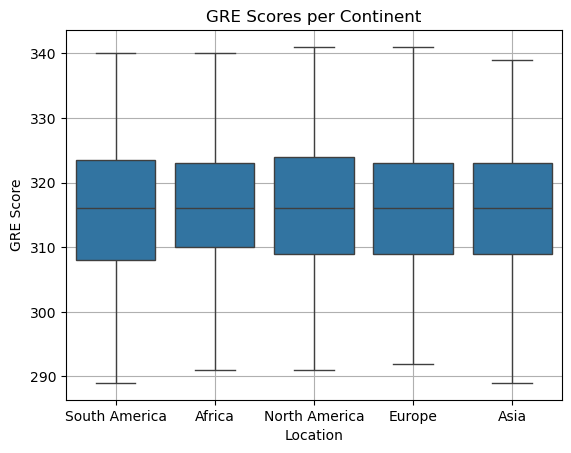

In [173]:
sns.boxplot(train, y='GRE Score', x='Location') 
plt.title('GRE Scores per Continent')

plt.grid(True);

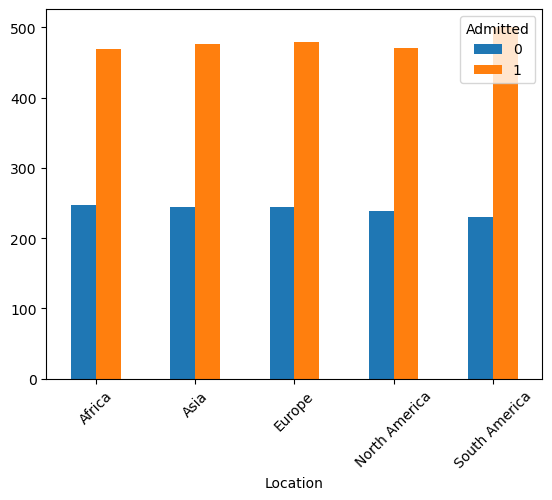

In [106]:
prop_df = train.groupby(['Location', 'Admitted']).size().unstack(fill_value=0)
# prop_df.plot(kind='bar')
prop_df.plot(kind='bar', rot=45);

<Axes: xlabel='Admitted', ylabel='Location'>

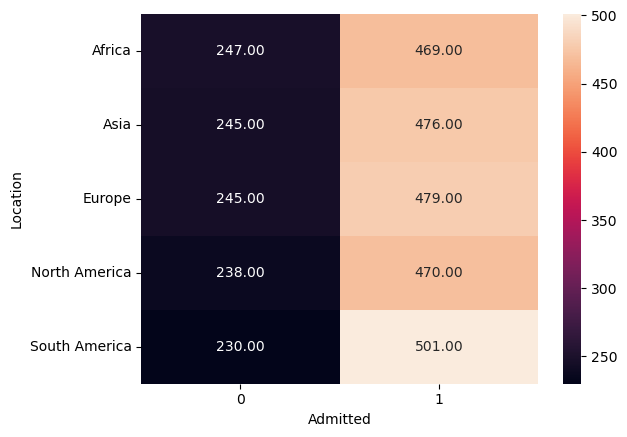

In [33]:
sns.heatmap(prop_df, annot=True, fmt='.2f')

In [34]:
prop_df['zeros_ratio'] = prop_df[0] / prop_df.sum(axis=1)
prop_df['ones_ratio'] = prop_df[1]/ prop_df.sum(axis=1)
prop_df

Admitted,0,1,zeros_ratio,ones_ratio
Location,,,,
Africa,247,469,0.344972,0.654712
Asia,245,476,0.339806,0.659883
Europe,245,479,0.338398,0.661293
North America,238,470,0.336158,0.663527
South America,230,501,0.314637,0.685068


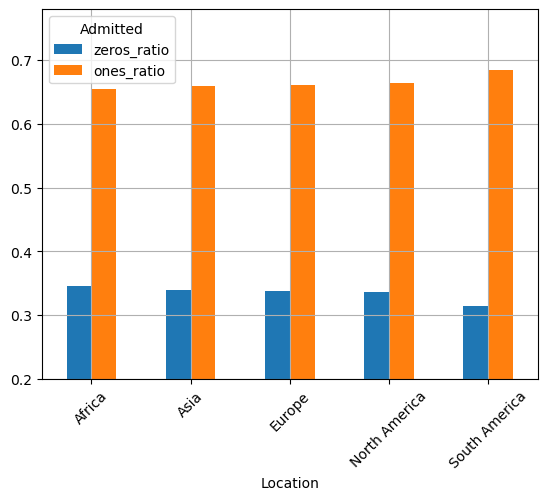

In [102]:
prop_df[['zeros_ratio', 'ones_ratio']].plot(kind='bar', rot=45)
plt.ylim(.2,.78)
plt.grid(True);

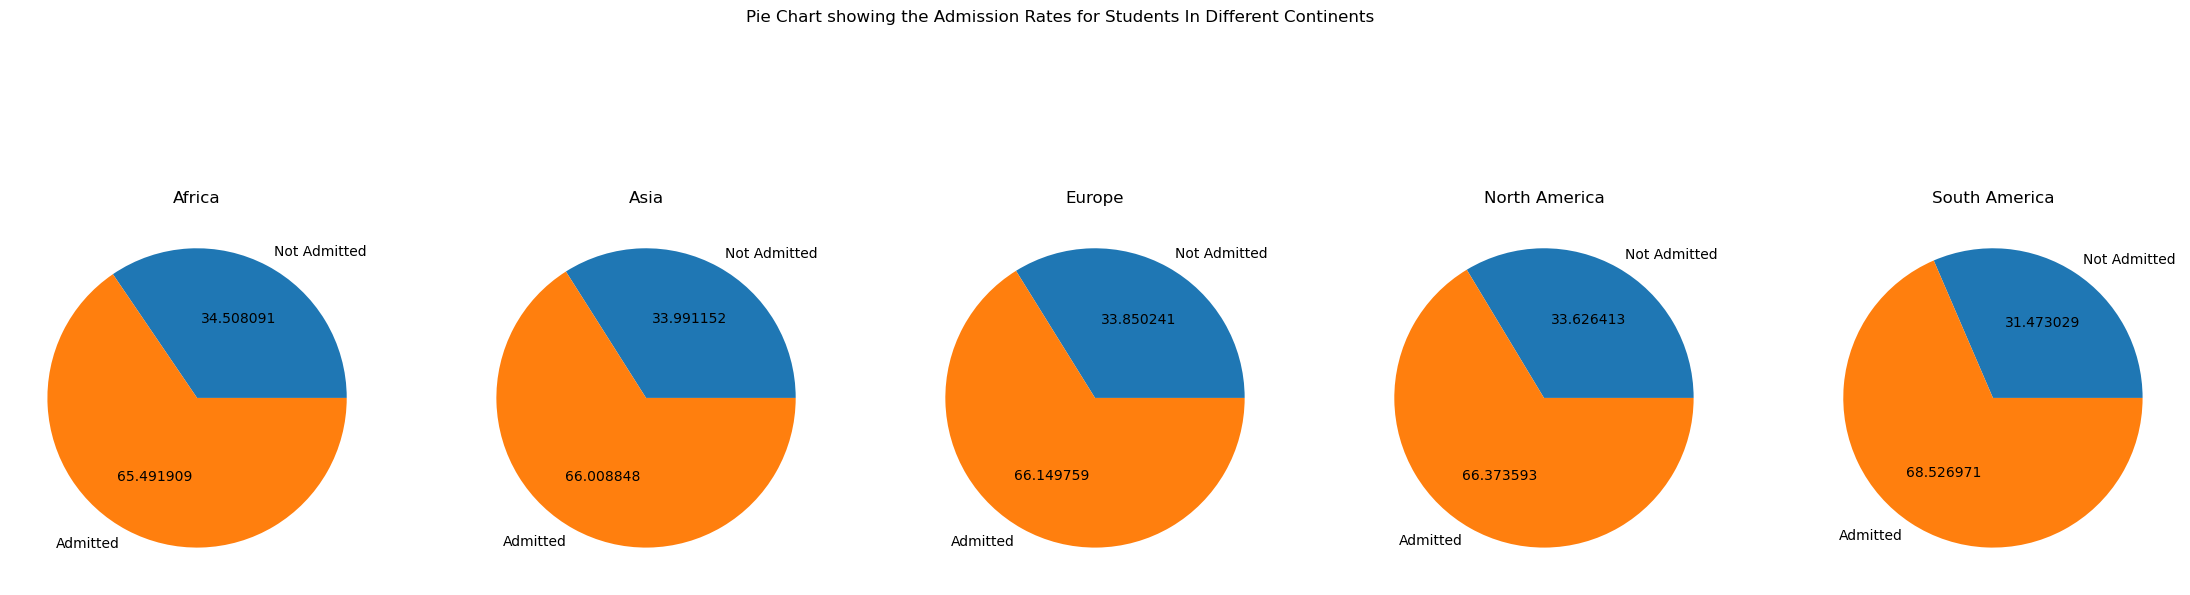

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=len(prop_df), figsize=(28,8))

#Loop through ax and the prop_df dataframe to obtain pie charts for each continent
for axis, (i, j) in zip(ax, prop_df.iterrows()):
    axis.pie([j['zeros_ratio'], j['ones_ratio']], labels=['Not Admitted','Admitted'], autopct='%f')
    axis.set_title(i)
    plt.suptitle('Pie Chart showing the Admission Rates for Students In Different Continents')
    # plt.tight_layout()

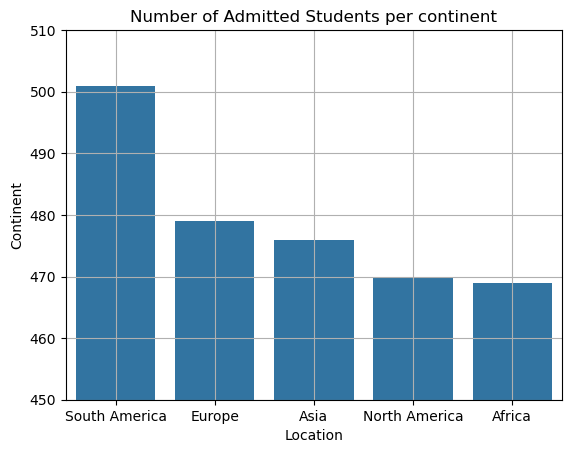

In [160]:
sns.barplot(prop_df[1].sort_values(ascending=False))
plt.ylim(450, 510)
plt.title('Number of Admitted Students per continent')
plt.ylabel('Continent')
plt.grid(True);
plt.savefig('Admitted students per continent', bbox_inches='tight');

C:\Users\hp\AppData\Local\Temp\ipykernel_8184\1201566536.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(['Location', 'University Rating']).size().unstack().plot(kind='bar', rot=45)


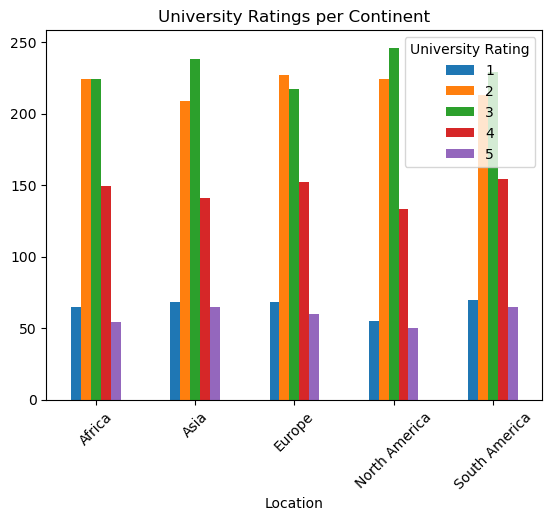

In [42]:
train.groupby(['Location', 'University Rating']).size().unstack().plot(kind='bar', rot=45)
plt.title('University Ratings per Continent')
plt.;

### The dataset is split into train and test sets, also we account for the class imbalance in the target variable by using `stratify` while splitting the data.

In [162]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,\
                                RandomForestClassifier, VotingClassifier

from sklearn.preprocessing import StandardScaler
X = train.drop(['Admitted', 'ID'], axis=1)
X = pd.get_dummies(X, columns=['Location'], drop_first=True)
y = train['Admitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using Logistic Regression as the baseline model


F1 Score for Logistic Regression: 0.8899653979238754


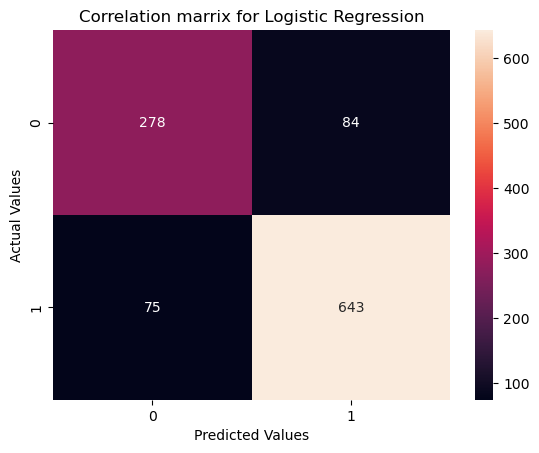

In [170]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_preds = log_reg.predict(X_test_scaled)
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='.0f')
log_reg_score = f1_score(y_test, log_preds)
print(f'F1 Score for Logistic Regression: {log_reg_score}')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Correlation marrix for Logistic Regression')
plt.savefig('corr matrix2 for logreg.png',  bbox_inches='tight');

F1 Score for Gradient Boost: 0.8993754337265788


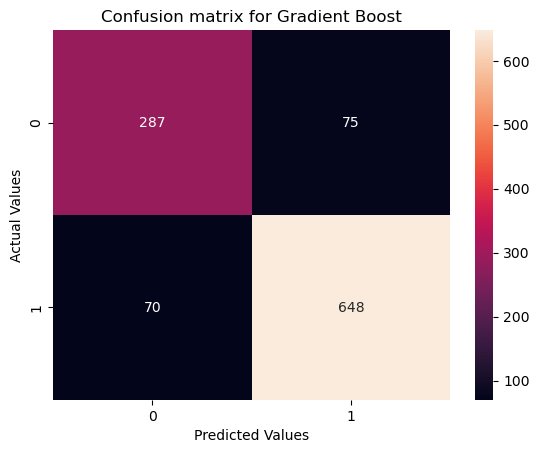

In [174]:
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
grad_preds = grad_clf.predict(X_test)
grad_score = f1_score(y_test, grad_preds)
print(f'F1 Score for Gradient Boost: {grad_score}')
sns.heatmap(confusion_matrix(y_test, grad_preds), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');
plt.title('Confusion matrix for Gradient Boost');
plt.savefig('corr for grad.png', bbox_inches='tight');

F1 Score for Random Forest: 0.9034051424600417


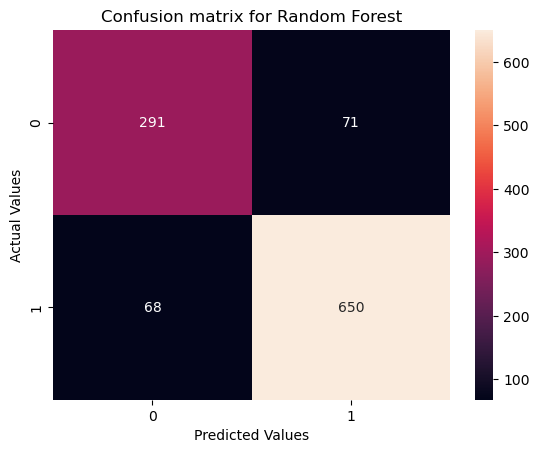

In [175]:
random_clf = RandomForestClassifier(200, max_depth=7)
random_clf.fit(X_train_scaled, y_train)
random_preds = random_clf.predict(X_test_scaled)
rf_clf_score = f1_score(y_test, random_preds)
print(f'F1 Score for Random Forest: {rf_clf_score}')
sns.heatmap(confusion_matrix(y_test, random_preds), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');
plt.title('Confusion matrix for Random Forest');
plt.savefig('corr mat for random.png', bbox_inches='tight');

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1 Score for Ada Boost: 0.883367839889579


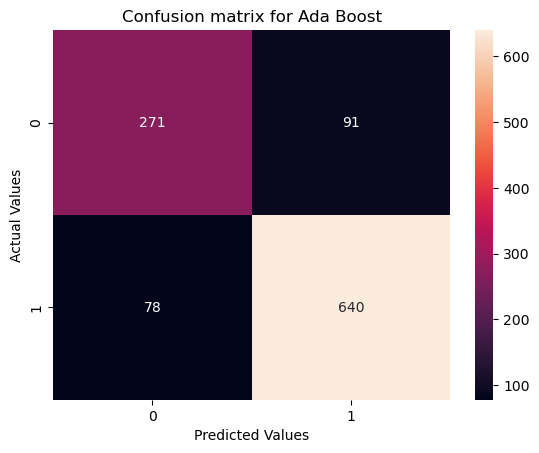

In [179]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train_scaled, y_train)
ada_preds = ada_clf.predict(X_test_scaled)
ada_score = f1_score(y_test, ada_preds)
print(f'F1 Score for Ada Boost: {ada_score}')
sns.heatmap(confusion_matrix(y_test, ada_preds), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');
plt.title('Confusion matrix for Ada Boost')
plt.savefig('corr mat for ada.png', bbox_inches='tight');

In [180]:
clfs = [('GradientBoostingClassifier', GradientBoostingClassifier()),\
               ('AdaBoostClassifier', AdaBoostClassifier()), ('RandomForestClassifier', RandomForestClassifier()), ('Xgboost', xgb.XGBClassifier())]
vc = VotingClassifier(clfs)
vc.fit(X_train_scaled, y_train)
vc_preds = vc.predict(X_test_scaled)
vc_score = f1_score(y_test, vc_preds)
print(f'F1 Score of Voting Classifers: {vc_score}')
# voter.fit(X_train, y_train)
# voter.preduict

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1 Score of Voting Classifers: 0.9004940014114327


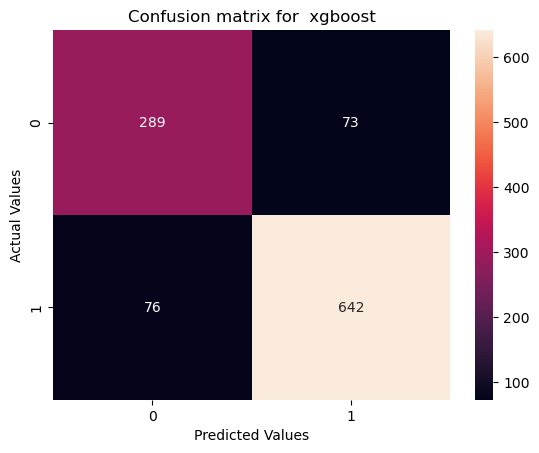

In [181]:
# from xgboost import XGBClassifier
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_scaled, y_train)
xgb_preds = xgb_clf.predict(X_test_scaled)
xgb_score = f1_score(y_test, xgb_preds)
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');
plt.title('Confusion matrix for  xgboost')
plt.savefig('corr mat for xgb.png', bbox_inches='tight');

In [182]:
classifiers = ['Logistic Regression', 'GradientBoostingClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'Xgboost']
f1_scores = [log_reg_score, grad_score, rf_clf_score, ada_score, xgb_score]

model_scores_df = pd.DataFrame({'Model': [clf for clf in classifiers], 'F1 Scores': f1_scores}).sort_values('F1 Scores', ascending=False)
print(model_scores_df)
print(f'\n The best performing model is {model_scores_df.iloc[0,0]} which achieved an f1 score of {model_scores_df.iloc[0,1]}')



                        Model  F1 Scores
2      RandomForestClassifier   0.903405
1  GradientBoostingClassifier   0.899375
4                     Xgboost   0.896022
0         Logistic Regression   0.889965
3          AdaBoostClassifier   0.883368

 The best performing model is RandomForestClassifier which achieved an f1 score of 0.9034051424600417


#### From our barplots below, we can see that `GRE Score` is the most important feature for determining whether students gain Admission.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


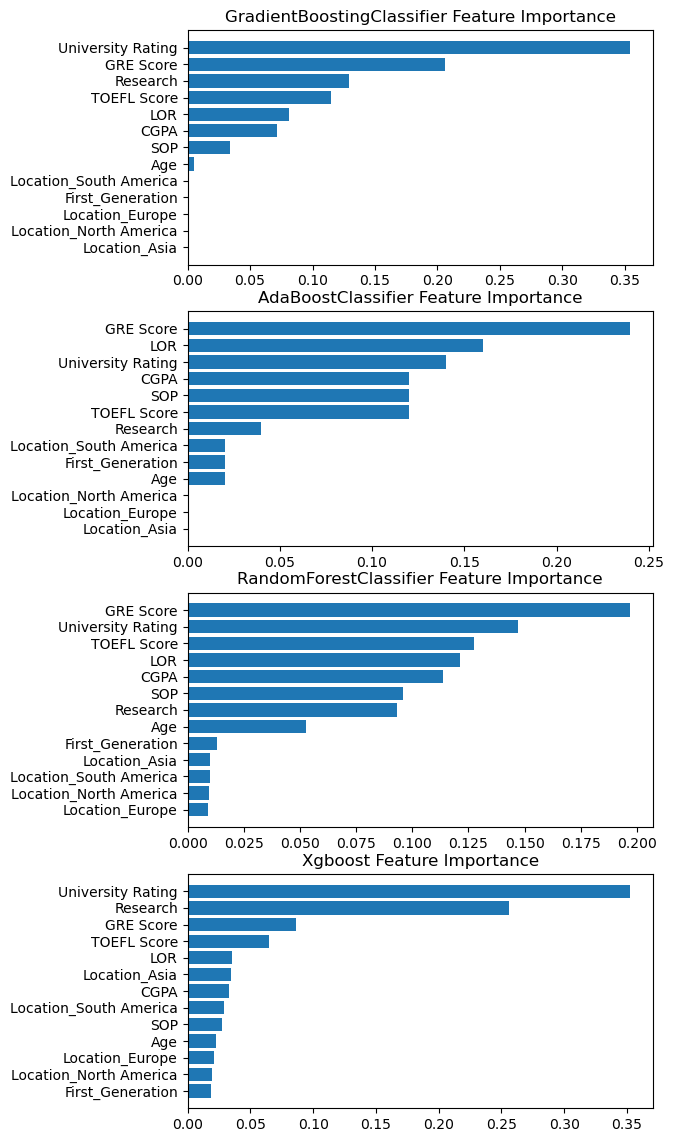

In [183]:
fig, ax = plt.subplots(ncols=1, nrows=len(clfs), figsize=(6, 14))
clf_df_list = []
for axis, (clf_name, clf) in zip(ax, clfs):
    clf.fit(X_train_scaled, y_train)
    clf_df = pd.DataFrame({'Feature':X.columns, 'Score': clf.feature_importances_}).sort_values('Score', ascending=True)
    axis.barh(width=clf_df.Score, y=clf_df.Feature)
    axis.set_title(clf_name+' Feature Importance')
    clf_df_list.append(clf_df)
plt.savefig('featurwe importances df.png', bbox_inches='tight');

#### The roc curve shows that the gradient boost model has great prediction power as it tends more to the top left corner.
#### Also, a `roc_auc_score` of 0.94 shows that our model has great discretionary power.

ROC AUC SCORE: 0.947633081457086


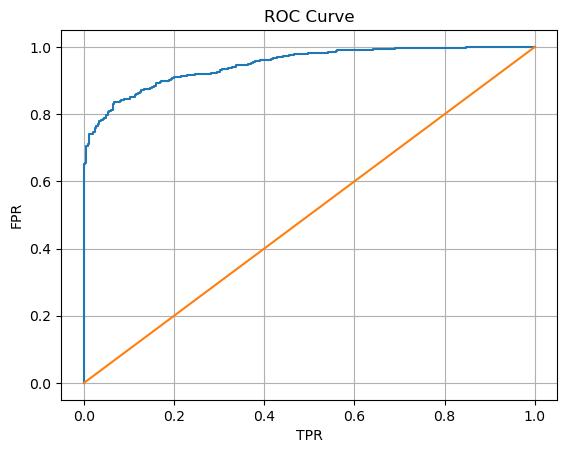

In [188]:
from sklearn.metrics import roc_curve, roc_auc_score
random_preds_proba = random_clf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, random_preds_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0,1])
plt.ylabel('FPR')
plt.xlabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
print(f'ROC AUC SCORE: {roc_auc_score(y_test, random_preds_proba)}')
plt.savefig('roc curve plot.png', bbox_inches='tight');

### Results and Interpretation
The Random Forest model performed best with an f1-score of 0.9034 and a roc_auc_score of 0.9476 after training and testing. These results show that the model is good at predicting the outcome of students admission. The F1-Score shows that the model strikes a good balance between not missing deserving candidates and not admitting undeserving candidates. The roc_auc score also shows that the model has a good ability to distinguish between the two target classes.
Model performance can be improved by collecting more data as our dataset is fairly small.

### Conclusion
This project explored the use of Machine Learning models to predict the outcome of students admission based of certain features. By using Logistic Regression and the baseline model and also using other advanced models, I was able to build and accurate and balanced predictor.
This project can one day help students to test their strengths before applying to institutions and also help institutions identify prospective candidates efficiently.
